In [4]:
import pandas as pd

# Load Excel file
df = pd.read_csv(r"C:\Users\PMLS\Downloads\archive (4)\Telco_customer_churn.csv")

# Basic inspection
print("🔹 Shape:", df.shape)
print("\n🔹 Columns:", df.columns.tolist())
print("\n🔹 Info:")
print(df.info())
print("\n🔹 Missing values:")
print(df.isnull().sum())


🔹 Shape: (7043, 33)

🔹 Columns: ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7

In [10]:
# Drop customerID (check exact spelling)
if "customerID" in df.columns:
    df = df.drop("customerID", axis=1)

# Convert TotalCharges → numeric (handle spaces or text)
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# Check missing values
print("Missing values after conversion:\n", df.isnull().sum())

# Drop rows with missing TotalCharges
df = df.dropna(subset=["Total Charges"])

# Remove duplicates if any
df = df.drop_duplicates()

print("✅ Data cleaned. New shape:", df.shape)



Missing values after conversion:
 Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64
✅ Data cleaned. New shape: (7032, 32)


🔹 Churn counts:
 Churn Label
No     5163
Yes    1869
Name: count, dtype: int64

🔹 Churn percentage:
 Churn Label
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14292\3356274980.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn Label", data=df, palette="Set2")


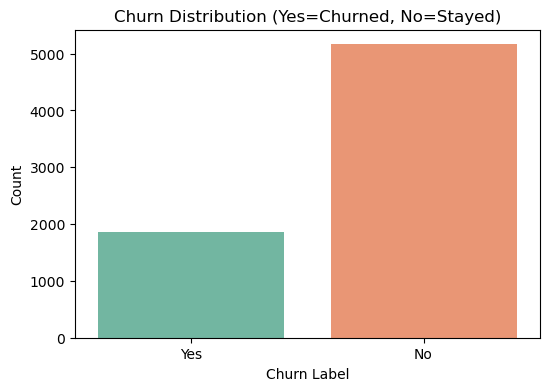

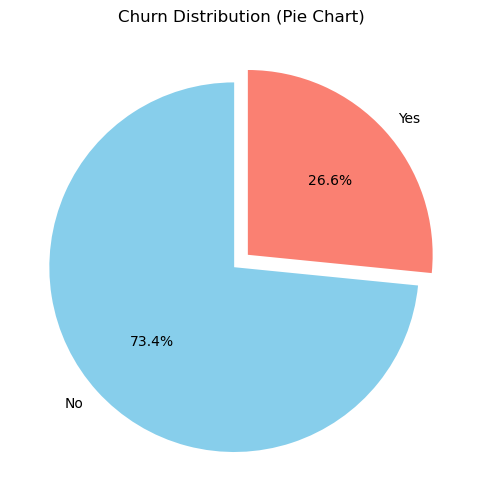

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values
churn_counts = df["Churn Label"].value_counts()
churn_percent = df["Churn Label"].value_counts(normalize=True) * 100

# Print counts & percentages
print("🔹 Churn counts:\n", churn_counts)
print("\n🔹 Churn percentage:\n", churn_percent)

# Bar chart
plt.figure(figsize=(6,4))
sns.countplot(x="Churn Label", data=df, palette="Set2")
plt.title("Churn Distribution (Yes=Churned, No=Stayed)")
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%", colors=["skyblue","salmon"], startangle=90, explode=(0.05,0.05))
plt.title("Churn Distribution (Pie Chart)")
plt.show()


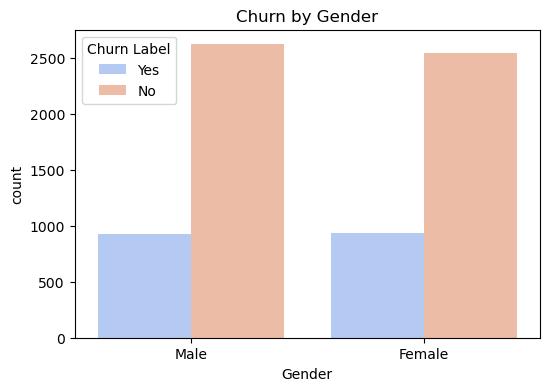

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Churn Label", data=df, palette="coolwarm")
plt.title("Churn by Gender")
plt.show()


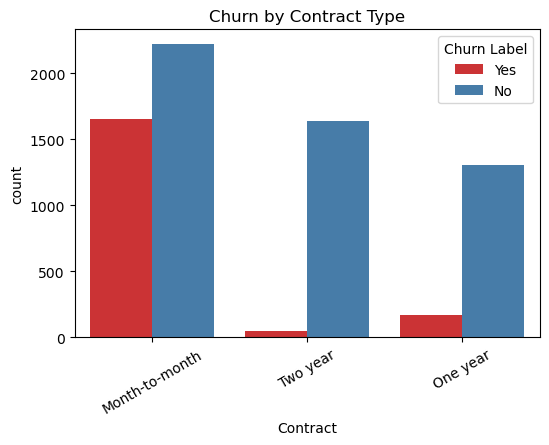

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn Label", data=df, palette="Set1")
plt.title("Churn by Contract Type")
plt.xticks(rotation=30)
plt.show()


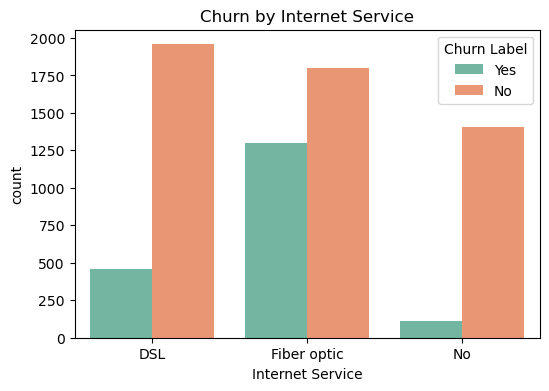

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="Internet Service", hue="Churn Label", data=df, palette="Set2")
plt.title("Churn by Internet Service")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14292\3566009831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn Label", y="Monthly Charges", data=df, palette="muted")


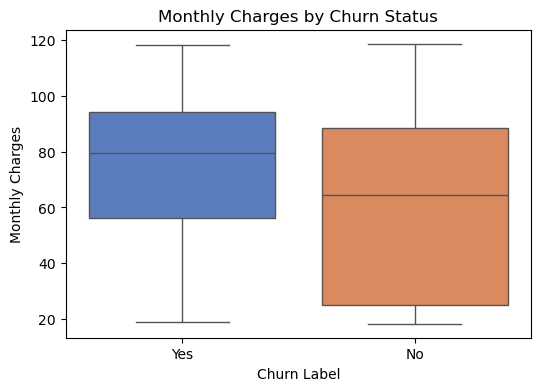

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn Label", y="Monthly Charges", data=df, palette="muted")
plt.title("Monthly Charges by Churn Status")
plt.show()


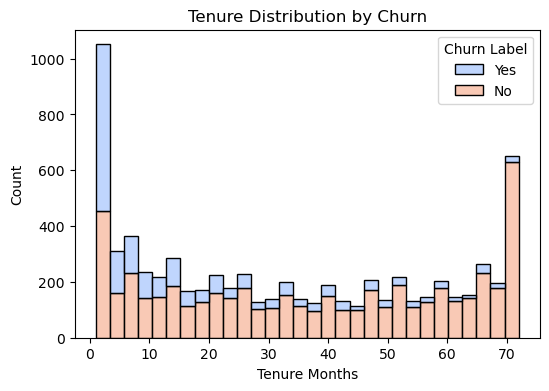

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Tenure Months", hue="Churn Label", multiple="stack", bins=30, palette="coolwarm")
plt.title("Tenure Distribution by Churn")
plt.show()


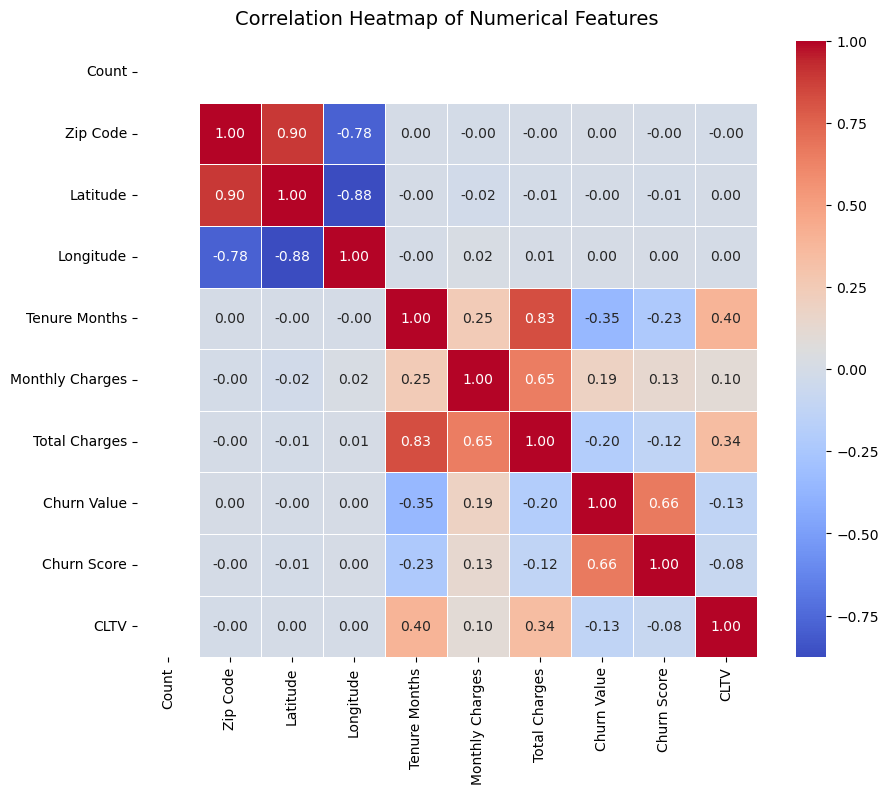

In [29]:
# 🔹 Correlation Heatmap for Numerical Features
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=12)
plt.show()


In [19]:
# Fill missing Total Charges with Monthly Charges * Tenure
df["Total Charges"] = df["Total Charges"].fillna(df["Monthly Charges"] * df["Tenure Months"])


In [20]:
# Identify categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()

print("Categorical Columns:", cat_cols)

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("✅ Shape after encoding:", df_encoded.shape)


Categorical Columns: ['Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Reason']
✅ Shape after encoding: (7032, 2836)


In [21]:
# Target column (churn = Yes/No)
y = df_encoded["Churn Label_Yes"]
X = df_encoded.drop(["Churn Label_Yes"], axis=1)

print("Feature Matrix Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Matrix Shape: (7032, 2835)
Target Shape: (7032,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (5625, 2835)
Test set size: (1407, 2835)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔹 Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1033
        True       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



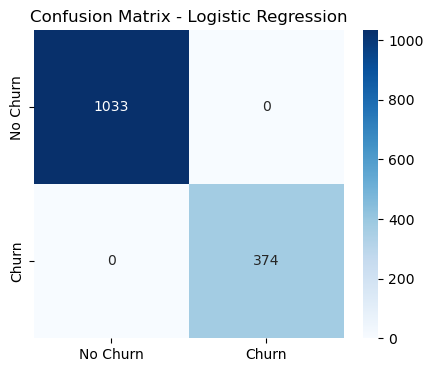

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluation
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


🔹 Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1033
        True       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



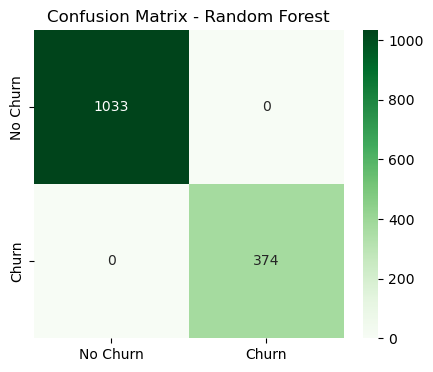

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # RF handles categorical data scaling less critically

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [26]:
print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


✅ Logistic Regression Accuracy: 1.0
✅ Random Forest Accuracy: 1.0


🔹 Logistic Regression AUC: 1.0
🔹 Random Forest AUC: 1.0


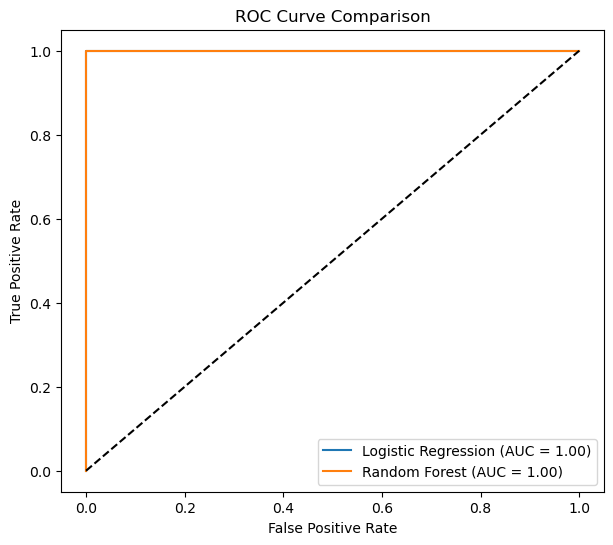

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities
y_prob_log = log_reg.predict_proba(X_test_scaled)[:,1]
y_prob_rf  = rf.predict_proba(X_test)[:,1]

# AUC scores
auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf  = roc_auc_score(y_test, y_prob_rf)

print("🔹 Logistic Regression AUC:", auc_log)
print("🔹 Random Forest AUC:", auc_rf)

# Plot ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _   = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1],[0,1], 'k--')  # diagonal reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14292\4109165448.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances.head(15), palette="viridis")


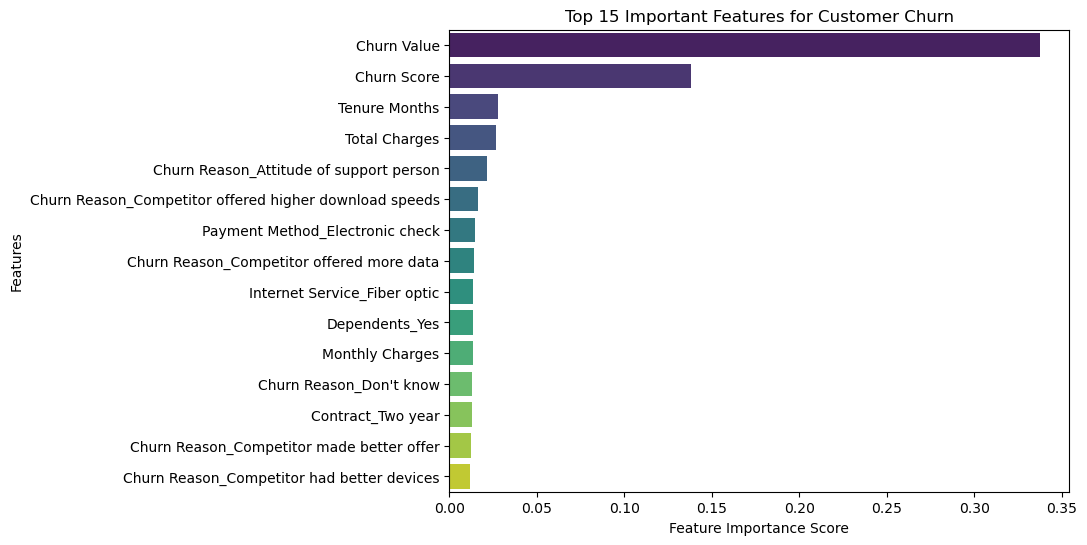

,Feature,Importance
7,Churn Value,0.337375
8,Churn Score,0.138297
4,Tenure Months,0.027968
6,Total Charges,0.026410
2816,Churn Reason_Attitude of support person,0.021473
2819,Churn Reason_Competitor offered higher downloa...,0.016671
2814,Payment Method_Electronic check,0.014780
2820,Churn Reason_Competitor offered more data,0.014190
2796,Internet Service_Fiber optic,0.013776
2792,Dependents_Yes,0.013667


In [28]:
# Feature Importance from Random Forest
import numpy as np

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Top 15 features
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(15), palette="viridis")
plt.title("Top 15 Important Features for Customer Churn")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# Display full ranking
feature_importances.head(20)
